<a href="https://colab.research.google.com/github/ilya-kkk/applied_ai/blob/main/%D0%9F%D1%80%D0%B0%D0%BA%D1%82%D0%B8%D1%87%D0%B5%D1%81%D0%BA%D0%B0%D1%8F_%D1%80%D0%B0%D0%B1%D0%BE%D1%82%D0%B0_1__%D0%9A%D0%BB%D0%B0%D1%81%D1%81%D0%B8%D1%84%D0%B8%D0%BA%D0%B0%D1%86%D0%B8%D1%8F.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Практическое задание № 1. Классификация


**Работу выполнил (а):**

Куликов Илья Вячеславович 470122

# Распознавание активности человека на основе данных с мобильных сенсоров

Необходимо по данным с мобильных сенсоров при помощи прикладных алгоритмов машинного обучения предсказать активность человека по шести классам движений:
* Движется по прямой
* Движется вверх (например, движение по лестнице вверх)
* Движется вниз (например, движение по лестнице вниз)
* Сидит
* Стоит
* Лежит

## Сведения о наборе данных
Набор данных содержит записи датчиков со сматфонов (акселерометр и гироскоп с частотой дискретизации 50 Гц) от 30 участников, выполняющих следующие действия: ходьба, ходьба по лестнице, ходьба по лестнице, сидение, стояние и лежание. Данные были предварительно обработаны при помощи фильтров шума. Набор данных представлен Хорхе Л. Рейес-Ортисом.

Признаки были извлечены из 3-х осевых необработанных сигналов акселерометра и гироскопа tAcc-XYZ и tGyro-XYZ. Эти сигналы были сняты с постоянной частотой 50 Гц. Затем были отфильтрованны с помощью медианного фильтра и низкочастотного фильтра Баттерворта 3-го порядка с частотой 20 Гц для удаления шумов. Аналогичным образом сигнал ускорения был разделен на сигналы ускорения тела и гравитации (`tBodyAcc-XYZ` и `tGravityAcc-XYZ`) с помощью другого низкочастотного фильтра Баттерворта с угловой частотой 0,3 Гц. Линейное ускорение тела и угловая скорость были использованы для получения сигналов "рывка" — (`tBodyAccJerk-XYZ` и `tBodyGyroJerk-XYZ`). Также величина этих трехмерных сигналов была расчитана с использованием евклидовой нормы — (`tBodyAccMag`, `tGravityAccMag`, `tBodyAccJerkMag`, `tBodyGyroMag`, `tBodyGyroJerkMag`).

Наконец, к некоторым из этих сигналов было применено быстрое преобразование Фурье (БПФ), в результате чего получились `fBodyAcc-XYZ`, `fBodyAccJerk-XYZ`, `fBodyGyro-XYZ`, `fBodyAccJerkMag`, `fBodyGyroMag`, `fBodyGyroJerkMag`. (Обратите внимание на "f" для обозначения сигналов в частотной области).

Набор переменных, которые были оценены по этим сигналам, следующий:
* mean(): Среднее значение
* std(): Стандартное отклонение
* mad(): Среднее абсолютное отклонение
* max(): Наибольшее значение в массиве
* min(): Наименьшее значение в массиве
* sma(): Область величины сигнала
* energy(): Мера энергии. Сумма квадратов, деленная на количество значений.
* iqr(): Интерквартильный размах
* entropy(): Энтропия сигнала
* arCoeff(): Коэффициенты авторегрессии с порядком Burg, равным 4
* correlation(): коэффициент корреляции между двумя сигналами
* maxInds(): индекс частотной составляющей с наибольшей величиной
* meanFreq(): средневзвешенное значение частотных компонент для получения средней частоты
* skewness(): перекос сигнала в частотной области
* kurtosis(): эксцесс сигнала в частотной области
* bandsEnergy(): Энергия частотного интервала в пределах 64 бинов БПФ каждого окна.
* angle(): Угол между векторами.
## Импорт библиотек
Первым делом импортируем необходимые библиотеки для работы с данными:

In [1]:
import os
import numpy as np
import pandas as pd

## Считываем набор данных

В прикладных задачах машинного обучения очень важен процесс извлечения признаков (feature extraction), в ходе которого данные интерпретируются в информативные признаки. Также этот процесс может называться проектирование признаков (feature engineering), это весьма трудоемкая и творческая задача. В рамках работы мы опустим эту часть и воспользуемся предобработанными данными.

In [3]:
def read_data(path, filename):
    return pd.read_csv(os.path.join(path, filename))

df = read_data('/content/', 'train.csv')
df.head()




,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,STANDING
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1,STANDING
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1,STANDING


Теперь, загрузим полный набор данных и сохранить его под следующими четырьмя переменными:

* `train_X`: признаки, используемые для обучения модели
* `train_y`: метки, используемые для обучения модели
* `test_X`: признаки, используемые для проверки модели
* `test_y`: метки, используемые для проверки модели

In [4]:
def load_dataset(label_dict):
    train_X = read_data('/content', 'train.csv').values[:,:-2]
    train_y = read_data('/content', 'train.csv')['Activity']
    train_y = train_y.map(label_dict).values
    test_X = read_data('/content', 'test.csv').values[:,:-2]
    test_y = read_data('/content', 'test.csv')
    test_y = test_y['Activity'].map(label_dict).values
    return(train_X, train_y, test_X, test_y)
label_dict = {'WALKING':0, 'WALKING_UPSTAIRS':1, 'WALKING_DOWNSTAIRS':2, 'SITTING':3, 'STANDING':4, 'LAYING':5}
train_X, train_y, test_X, test_y = load_dataset(label_dict)

## Выбор модели

Импортируйте выбранную вами модель из библиотеки `sklearn` и инициализируйте её в объект `model`:

Также необходимо выбрать **несколько** моделей ML для сравнения полученных результатов.

In [11]:
from sklearn.ensemble import GradientBoostingClassifier
model = GradientBoostingClassifier(
    n_estimators=250,      # число деревьев
    learning_rate=0.05,    # скорость обучения
    max_depth=4,           # глубина деревьев
    subsample=0.8,         # стохастический бустинг
    max_features="sqrt",   # выбор признаков
    min_samples_leaf=5,    # минимум объектов в листе
    random_state=42,
    verbose=1              # смотреть логи во время обучения
)

Опишите вашу мотивацию по выбору модели. Какие гиперпараметры есть у выбранной вами модели? За что они отвечают? На что влияют?


## Обоснование выбора гиперпараметров

- **n_estimators=250** – достаточно деревьев для обучения, но не слишком много, чтобы избежать переобучения на небольшом датасете.  
- **learning_rate=0.05** – уменьшенный шаг обучения для более стабильной сходимости (требует больше деревьев).  
- **max_depth=4** – ограничение глубины деревьев, чтобы снизить переобучение при большом числе признаков.  
- **subsample=0.8** – стохастический бустинг, добавляет случайность и улучшает обобщающую способность.  
- **max_features="sqrt"** – случайный выбор подмножества признаков уменьшает корреляцию деревьев и ускоряет обучение.  
- **min_samples_leaf=5** – минимальное число объектов в листе предотвращает слишком "узкие" деревья.  


## Обучение модели

Обучите модель, используя признаки из обучающего набора (`train_X`) и метки в качестве базовой истины (`train_y`).

In [12]:
model.fit(train_X, train_y)

      Iter       Train Loss      OOB Improve   Remaining Time 
         1           1.6024           0.1799            2.04m
         2           1.4490           0.1410            2.08m
         3           1.3261           0.1321            2.12m
         4           1.2267           0.0912            2.13m
         5           1.1440           0.0907            2.13m
         6           1.0581           0.0793            2.12m
         7           0.9891           0.0722            2.12m
         8           0.9189           0.0712            2.11m
         9           0.8612           0.0536            2.10m
        10           0.8069           0.0594            2.09m
        20           0.4415           0.0458            2.11m
        30           0.2701           0.0087            1.99m
        40           0.1763           0.0039            1.93m
        50           0.1204           0.0013            1.82m
        60           0.0877           0.0045            1.73m
       

GradientBoostingClassifier(learning_rate=0.05, max_depth=4, max_features='sqrt',
                           min_samples_leaf=5, n_estimators=250,
                           random_state=42, subsample=0.8, verbose=1)

## Оценка модели
Используйте обученную модель для прогнозирования активности движения, используя признаки из тестового набора (`test_X`). Прогнозы сохраните в списке `yhat`.

In [14]:
yhat = model.predict(test_X)
yhat

array([4, 4, 4, ..., 1, 1, 1])

In [15]:
from sklearn.metrics import classification_report
target_names = ['Walking', 'Walking Upstairs', 'Walking Downstairs', 'Sitting', 'Standing', 'Laying']

print(classification_report(test_y, yhat, target_names=target_names))

                    precision    recall  f1-score   support

           Walking       0.95      0.97      0.96       496
  Walking Upstairs       0.91      0.96      0.93       471
Walking Downstairs       0.97      0.90      0.94       420
           Sitting       0.94      0.90      0.92       491
          Standing       0.91      0.95      0.93       532
            Laying       1.00      1.00      1.00       537

          accuracy                           0.95      2947
         macro avg       0.95      0.94      0.95      2947
      weighted avg       0.95      0.95      0.95      2947



In [16]:
#Результаты сравнения






## Задание


#Выведите отчет о классификации, сравнив предсказания (`yhat`) с базовой истиной (`test_y`).
| Класс                 | Precision | Recall | F1-score | Support |
|-----------------------|----------|--------|----------|---------|
| Walking               | 0.95     | 0.97   | 0.96     | 496     |
| Walking Upstairs      | 0.91     | 0.96   | 0.93     | 471     |
| Walking Downstairs    | 0.97     | 0.90   | 0.94     | 420     |
| Sitting               | 0.94     | 0.90   | 0.92     | 491     |
| Standing              | 0.91     | 0.95   | 0.93     | 532     |
| Laying                | 1.00     | 1.00   | 1.00     | 537     |
| **Accuracy**          |          |        | 0.95     | 2947    |
| **Macro Avg**         | 0.95     | 0.94   | 0.95     | 2947    |
| **Weighted Avg**      | 0.95     | 0.95   | 0.95     | 2947    |

#В чем разница между показателями `precision` и `recall`? Что такое показатель `F1`?

- **Precision (точность)** – доля объектов, предсказанных как положительные, которые действительно являются положительными.  
  Формула:  
  
  $ Precision = \frac{TP}{TP + FP} $
  

- **Recall (полнота)** – доля правильно найденных положительных объектов среди всех реально положительных.  
  Формула:  
  
  $ Recall = \frac{TP}{TP + FN} $
  

- **F1-score** – гармоническое среднее между precision и recall. Используется, когда важно сбалансировать обе метрики.  
  Формула:  
  
  $ F1 = 2 \cdot \frac{Precision \cdot Recall}{Precision + Recall} $
  

#Что такое гиперпараметры модели машинного обучения (МО)?
**Гиперпараметры** – это параметры, которые задаются **до обучения модели** и управляют её структурой или процессом обучения.  
Примеры:
- число деревьев (`n_estimators`) и глубина деревьев (`max_depth`) в бустинге;
- скорость обучения (`learning_rate`);
- размер скрытых слоёв в нейросетях.  

Гиперпараметры влияют на качество, скорость и устойчивость модели.


#Обучим knn, svm, logistic regression и сравним результаты с бустингом

In [33]:
from sklearn.neighbors import KNeighborsClassifier
mmodel_knn = KNeighborsClassifier(
    n_neighbors=5,      # количество ближайших соседей, которые участвуют в голосовании
                         # меньшее значение = модель более чувствительна к шуму
                         # большее значение = модель более гладкая, менее чувствительна к выбросам

    weights='distance'  # способ взвешивания голосов соседей
                         # 'uniform' – все соседи равны
                         # 'distance' – ближние соседи влияют сильнее (обычно улучшает точность)
)

model_knn.fit(train_X, train_y)
yhat_knn = model_knn.predict(test_X)

In [34]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

model_svm = make_pipeline(
    StandardScaler(),  # нормализация признаков, важна для RBF-ядра, чтобы разные масштабы признаков не влияли на расстояния
    SVC(
        kernel='rbf',      # тип ядра (radial basis function), позволяет решать нелинейные задачи
        C=1.0,             # коэффициент регуляризации: баланс между точностью на обучении и обобщающей способностью; большое C → меньше регуляризации
        gamma='scale',     # коэффициент ядра RBF, контролирует "ширину" гауссового ядра; больше gamma → модель запоминает мелкие детали, риск переобучения
        probability=True   # включает вычисление вероятностей классов (нужно, если планируется predict_proba)
    )
)

model_svm.fit(train_X, train_y)
yhat_svm = model_svm.predict(test_X)



In [35]:
from sklearn.linear_model import LogisticRegression
model_logr = LogisticRegression(
    multi_class='multinomial',  # Использовать многоклассовую стратегию "мультиноциальную" (softmax), а не one-vs-rest
    solver='lbfgs',              # Алгоритм оптимизации, подходит для небольших и средних датасетов и многоклассовой классификации
    C=1.0,                       # Инверсная величина регуляризации: меньше C = сильнее регуляризация, выше C = слабее регуляризация
    max_iter=500,                 # Максимальное число итераций для сходимости оптимизатора
    random_state=42               # Фиксируем генератор случайных чисел для воспроизводимости результатов
)

model_logr.fit(train_X, train_y)
yhat_logr = model_logr.predict(test_X)



/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


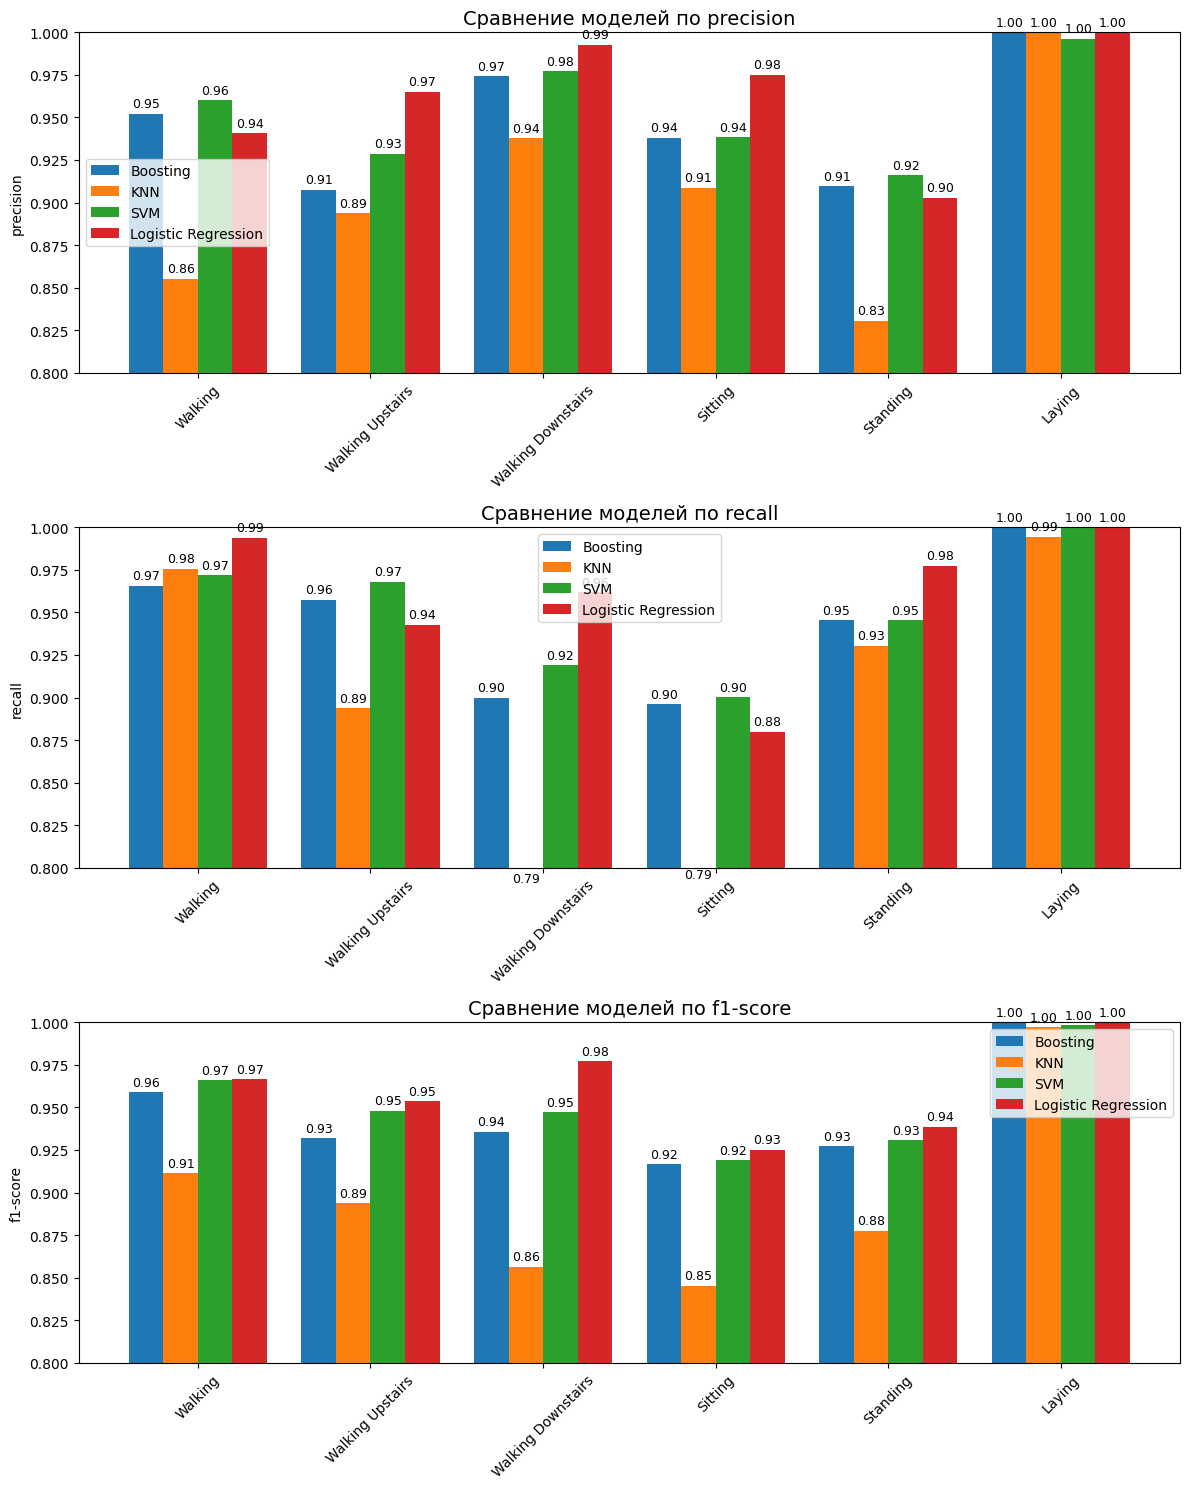

In [36]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import classification_report

# Список моделей и их предсказаний
models = {
    "Boosting": yhat,
    "KNN": yhat_knn,
    "SVM": yhat_svm,
    "Logistic Regression": yhat_logr
}

target_names = ['Walking', 'Walking Upstairs', 'Walking Downstairs', 'Sitting', 'Standing', 'Laying']

# Словарь для хранения метрик
metrics = {model: {} for model in models}

# Получаем precision, recall, f1-score для каждого класса
for name, y_pred in models.items():
    report = classification_report(test_y, y_pred, target_names=target_names, output_dict=True)
    for cls in target_names:
        metrics[name].setdefault("precision", []).append(report[cls]["precision"])
        metrics[name].setdefault("recall", []).append(report[cls]["recall"])
        metrics[name].setdefault("f1-score", []).append(report[cls]["f1-score"])

# Построение графиков
x = np.arange(len(target_names))  # позиции классов
width = 0.2  # ширина столбцов

fig, axes = plt.subplots(3, 1, figsize=(12, 15))
metric_names = ["precision", "recall", "f1-score"]

for i, metric_name in enumerate(metric_names):
    ax = axes[i]
    for j, (model_name, model_metrics) in enumerate(metrics.items()):
        bars = ax.bar(x + j*width, model_metrics[metric_name], width, label=model_name)
        # Добавляем метки значений над столбцами
        for bar in bars:
            height = bar.get_height()
            ax.text(bar.get_x() + bar.get_width()/2, height + 0.002, f'{height:.2f}', ha='center', va='bottom', fontsize=9)

    ax.set_title(f"Сравнение моделей по {metric_name}", fontsize=14)
    ax.set_xticks(x + width * (len(models)-1)/2)
    ax.set_xticklabels(target_names, rotation=45)
    ax.set_ylim(0.8, 1.0)  # ограничение диапазона по Y
    ax.set_ylabel(metric_name)
    ax.legend()

plt.tight_layout()
plt.show()


#Опишите влияние гиперпараметров в выбранных вами моделях МО.